In [34]:
%load_ext autoreload
%autoreload 2
%cd ..

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö


In [2]:
from scripts import Slopes
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.random.set_seed(0)

In [6]:
from matplotlib import pyplot as plt

# Idee 
vähendame treeningandmete kogust kuhugi 40 peale ja teeme 5-5 mudeliga katseid, kuidas andmepunktide algne jaotus asju mõjutab.

In [3]:
X = np.linspace(-1, 1, 50)
y = X**2

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True) 

In [4]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=1, activation='linear'),
])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True) 
model.summary()
model.weights

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense/kernel:0' shape=(1, 5) dtype=float32, numpy=
 array([[-0.63489604,  0.14800692, -0.7338972 , -0.07911539,  0.65360975]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[ 0.27755034, -0.58556056,  0.26061606, -0.5330119 , -0.59735894],
        [ 0.11725867,  0.06406617,  0.7351264 , -0.5939754 , -0.71575356],
        [-0.709211  ,  0.02863938,  0.65210843, -0.5328102 , -0.2733997 ],
        [ 0.5606067 ,  0.42332137,  0.00369245, -0.02371192,  0.5790775 ],
        [ 0.45277786, -0.04605985,  0.14292157,  0.27956522,  0.5873213 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 0.19567442],
        [ 0.6113417 ],
        [-0.7563119 ],
        [ 0.891

In [ ]:
from keras.callbacks import Callback
class print_training_on_text_every_10_epochs_Callback(Callback):
    def __init__(self, logpath=""):
        self.logpath = logpath
        print(logpath)

    def on_epoch_end(self, epoch, logs=None):
        if(int(epoch) % 10) == 0:
            print("Epoch: {:>3} | Loss: ".format(epoch) + f"{logs['loss']:.4e}" + " | Valid loss: " + f"{logs['val_loss']:.4e}")

In [29]:
model.compile(
    #optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),#, amsgrad=True),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=32, epochs=500, verbose=0,
              validation_data=(X_valid, y_valid),
              callbacks=[print_training_on_text_every_10_epochs_Callback("tsau")])


Epoch:   0 | Loss: 8.7999e-05 | Valid loss: 2.2352e-05
Epoch:  10 | Loss: 7.7073e-05 | Valid loss: 2.3967e-05
Epoch:  20 | Loss: 7.6558e-05 | Valid loss: 3.1369e-05
Epoch:  30 | Loss: 7.6740e-05 | Valid loss: 2.1409e-05
Epoch:  40 | Loss: 7.6713e-05 | Valid loss: 2.8892e-05
Epoch:  50 | Loss: 7.6260e-05 | Valid loss: 2.5449e-05
Epoch:  60 | Loss: 7.6139e-05 | Valid loss: 2.7566e-05
Epoch:  70 | Loss: 7.5694e-05 | Valid loss: 2.1896e-05
Epoch:  80 | Loss: 7.6988e-05 | Valid loss: 2.4938e-05
Epoch:  90 | Loss: 7.6187e-05 | Valid loss: 2.5470e-05
Epoch: 100 | Loss: 7.5968e-05 | Valid loss: 2.6240e-05
Epoch: 110 | Loss: 7.5888e-05 | Valid loss: 3.4696e-05
Epoch: 120 | Loss: 7.6429e-05 | Valid loss: 3.7705e-05
Epoch: 130 | Loss: 7.5816e-05 | Valid loss: 2.2101e-05
Epoch: 140 | Loss: 7.5331e-05 | Valid loss: 2.9025e-05
Epoch: 150 | Loss: 7.5310e-05 | Valid loss: 3.0202e-05
Epoch: 160 | Loss: 7.5053e-05 | Valid loss: 3.2204e-05
Epoch: 170 | Loss: 7.5715e-05 | Valid loss: 2.5978e-05
Epoch: 180

model contains 88 breaks
32/32 [==============================] - 0s 4ms/step


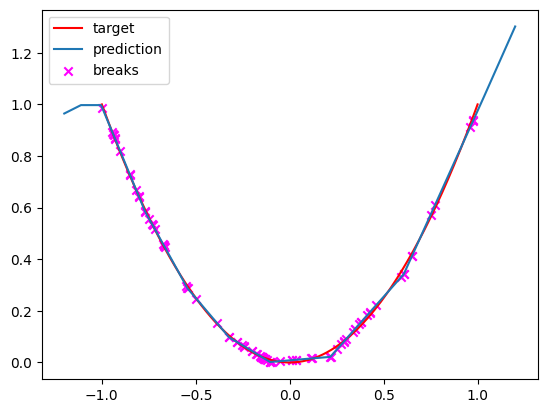

In [33]:
X = np.linspace(-1, 1, 1000)
y = X**2

X_pred = np.linspace(-1.2, 1.2, 1000)

bpoints = Slopes.slope_checker(model, X, max_delta=0.0001)
print(f"model contains {len(bpoints)} breaks")
plt.plot(X, y, color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.scatter(*zip(*bpoints), marker="x", color='magenta', label="breaks")
plt.legend()

## 5-5 võrk, adam, 3 erinevas kohas punktikesi (10-10-10-20), no noise

In [49]:
x1, x2, x3 = -0.6, 0, 0.2
X1 = np.random.normal(x1, 0.3, 10)
X2 = np.random.normal(x2, 0.3, 10)
X3 = np.random.normal(x3, 0.3, 10)
X4 = np.random.uniform(-1, 1, 20)
X = np.concatenate((X1, X2, X3, X4))
y = X**2

In [39]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=1, activation='linear'),
])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True) 
model.summary()
model.weights

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense_3/kernel:0' shape=(1, 5) dtype=float32, numpy=
 array([[-0.24175048, -0.9486449 ,  0.6604042 , -0.7260158 ,  0.6792605 ]],
       dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[ 0.31083274, -0.33053085, -0.22316188,  0.0317294 ,  0.17976195],
        [ 0.02065182,  0.4206431 , -0.03771168,  0.19551629,  0.21030217],
        [ 0.13548917, -0.03507668, -0.48136717,  0.41543758, -0.12399131],
        [ 0.6467997 ,  0.01059151, -0.61451423,  0.01097023, -0.13924778],
        [-0.0667178 , -0.5783129 ,  0.21739769,  0.6483855 , -0.19817543]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[-0.6365688 ],
        [-0.31067753],
        [ 0.9904127 ],
        [ 0

In [45]:
model.compile(
    #optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),#, amsgrad=True),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=32, epochs=1500, verbose=0,
              validation_data=(X_valid, y_valid),
              callbacks=[print_training_on_text_every_10_epochs_Callback("tsau")])


Epoch:   0 | Loss: 5.9660e-02 | Valid loss: 3.4530e-02
Epoch:  10 | Loss: 5.7619e-02 | Valid loss: 3.3710e-02
Epoch:  20 | Loss: 5.5740e-02 | Valid loss: 3.2925e-02
Epoch:  30 | Loss: 5.4026e-02 | Valid loss: 3.2203e-02
Epoch:  40 | Loss: 5.2398e-02 | Valid loss: 3.1530e-02
Epoch:  50 | Loss: 5.0897e-02 | Valid loss: 3.0867e-02
Epoch:  60 | Loss: 4.9529e-02 | Valid loss: 3.0217e-02
Epoch:  70 | Loss: 4.8241e-02 | Valid loss: 2.9580e-02
Epoch:  80 | Loss: 4.7009e-02 | Valid loss: 2.8949e-02
Epoch:  90 | Loss: 4.5833e-02 | Valid loss: 2.8313e-02
Epoch: 100 | Loss: 4.4676e-02 | Valid loss: 2.7743e-02
Epoch: 110 | Loss: 4.3625e-02 | Valid loss: 2.7142e-02
Epoch: 120 | Loss: 4.2622e-02 | Valid loss: 2.6539e-02
Epoch: 130 | Loss: 4.1630e-02 | Valid loss: 2.5918e-02
Epoch: 140 | Loss: 4.0682e-02 | Valid loss: 2.5322e-02
Epoch: 150 | Loss: 3.9746e-02 | Valid loss: 2.4727e-02
Epoch: 160 | Loss: 3.8837e-02 | Valid loss: 2.4124e-02
Epoch: 170 | Loss: 3.7935e-02 | Valid loss: 2.3556e-02
Epoch: 180

model contains 38 breaks
32/32 [==============================] - 0s 3ms/step


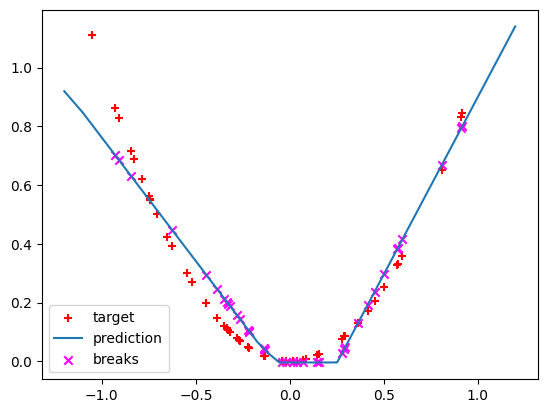

In [50]:
X_pred = np.linspace(-1.2, 1.2, 1000)

bpoints = Slopes.slope_checker(model, X, max_delta=0.0001)
print(f"model contains {len(bpoints)} breaks")
plt.scatter(X, y, marker="+", color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.scatter(*zip(*bpoints), marker="x", color='magenta', label="breaks")
plt.legend()

## Teine algne paigutus

In [51]:
x1, x2, x3 = -0.7, 0, 0.8
X1 = np.random.normal(x1, 0.3, 20)
X2 = np.random.normal(x2, 0.3, 10)
X3 = np.random.normal(x3, 0.3, 20)
X4 = np.random.uniform(-1, 1, 10)
X = np.concatenate((X1, X2, X3, X4))
y = X**2

In [55]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=1, activation='linear'),
])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True) 
model.summary()

model.compile(
    #optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),#, amsgrad=True),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=32, epochs=3000, verbose=0,
              validation_data=(X_valid, y_valid),
              callbacks=[print_training_on_text_every_10_epochs_Callback("tsau")])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 10        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
Epoch:   0 | Loss: 2.2258e-01 | Valid loss: 2.3571e-01
Epoch:  10 | Loss: 2.1590e-01 | Valid loss: 2.2979e-01
Epoch:  20 | Loss: 2.0844e-01 | Valid loss: 2.2341e-01
Epoch:  30 | Loss: 2.0132e-01 | Valid loss: 2.1724e-01
Epoch:  40 | Loss: 1.9453e-01 | Valid loss: 2.1130e-01
Epoch:  50 | Loss: 1.8797e-01 | Valid loss: 2.0

model contains 33 breaks
32/32 [==============================] - 0s 2ms/step


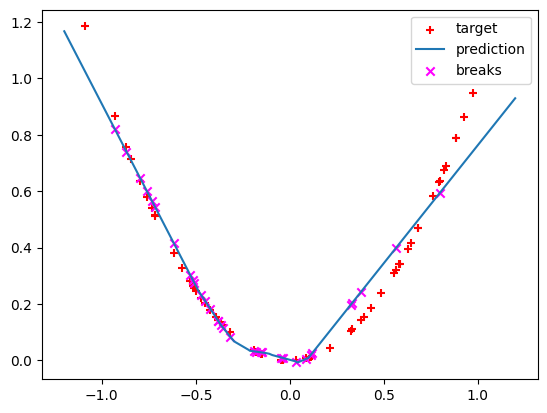

In [56]:
X_pred = np.linspace(-1.2, 1.2, 1000)

bpoints = Slopes.slope_checker(model, X, max_delta=0.0001)
print(f"model contains {len(bpoints)} breaks")
plt.scatter(X, y, marker="+", color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.scatter(*zip(*bpoints), marker="x", color='magenta', label="breaks")
plt.legend()

## Kolmas paiguts

In [63]:
x1, x2, x3 = 0, 0.5, -0.5
X1 = np.random.normal(x1, 0.1, 25)
X2 = np.random.normal(x2, 0.2, 1)
X3 = np.random.normal(x3, 0.2, 10)
X4 = np.random.uniform(-1, 1, 15)
X = np.concatenate((X1, X2, X3, X4))
y = X**2

In [65]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=1, activation='linear'),
])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True) 
model.summary()

model.compile(
    #optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),#, amsgrad=True),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=32, epochs=500, verbose=0,
              validation_data=(X_valid, y_valid),
              callbacks=[print_training_on_text_every_10_epochs_Callback("tsau")])
model.compile(
    #optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),#, amsgrad=True),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=32, epochs=2000, verbose=0,
              validation_data=(X_valid, y_valid),
              callbacks=[print_training_on_text_every_10_epochs_Callback("tsau")])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 10        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
Epoch:   0 | Loss: 2.7616e-02 | Valid loss: 6.3858e-02
Epoch:  10 | Loss: 2.6526e-02 | Valid loss: 6.1340e-02
Epoch:  20 | Loss: 2.5574e-02 | Valid loss: 5.8990e-02
Epoch:  30 | Loss: 2.4913e-02 | Valid loss: 5.7471e-02
Epoch:  40 | Loss: 2.4415e-02 | Valid loss: 5.6220e-02
Epoch:  50 | Loss: 2.3967e-02 | Valid loss: 5.5

model contains 40 breaks
32/32 [==============================] - 0s 6ms/step


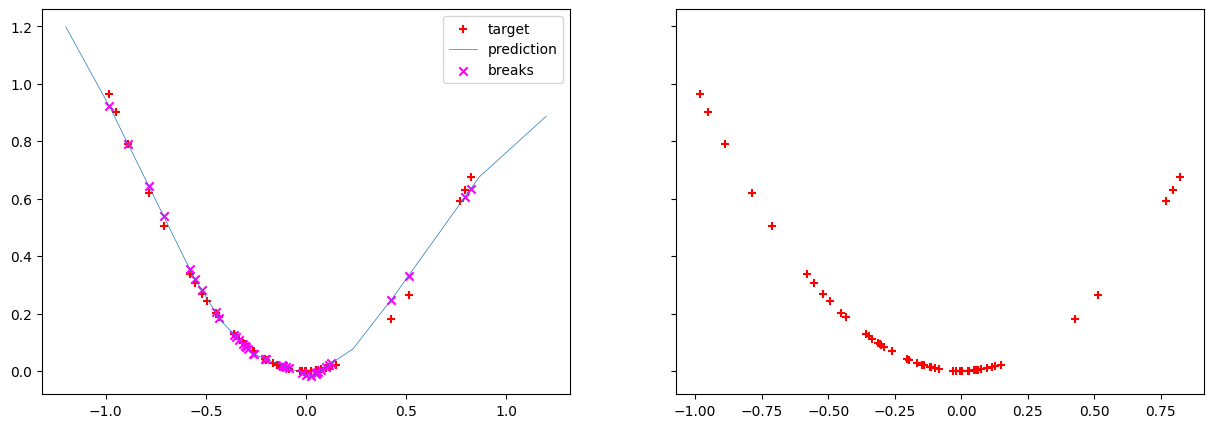

In [82]:
X_pred = np.linspace(-1.2, 1.2, 1000)

bpoints = Slopes.slope_checker(model, X, max_delta=0.0001)
print(f"model contains {len(bpoints)} breaks")

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.scatter(X, y, marker="+", color='red', label="target")
ax1.plot(X_pred, model.predict(X_pred), label="prediction",  linewidth=0.5)
ax1.scatter(*zip(*bpoints), marker="x", color='magenta', label="breaks")
ax1.legend()
ax2.scatter(X, y, marker="+", color='red', label="target")
plt.show()


## Random noisiga

In [88]:
x1, x2, x3 = 0, 0.5, -0.5
X1 = np.random.normal(x1, 0.1, 25)
X2 = np.random.normal(x2, 0.2, 1)
X3 = np.random.normal(x3, 0.2, 10)
X4 = np.random.uniform(-1, 1, 15)
X = np.concatenate((X1, X2, X3, X4))
y = X**2 + np.random.normal(0, 0.02, len(X))

In [89]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=1, activation='linear'),
])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True) 
model.summary()

model.compile(
    #optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),#, amsgrad=True),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=32, epochs=3000, verbose=0,
              validation_data=(X_valid, y_valid),
              callbacks=[print_training_on_text_every_10_epochs_Callback("tsau")])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 10        
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
Epoch:   0 | Loss: 6.6967e-02 | Valid loss: 1.4962e-01
Epoch:  10 | Loss: 6.5487e-02 | Valid loss: 1.4691e-01
Epoch:  20 | Loss: 6.4062e-02 | Valid loss: 1.4429e-01
Epoch:  30 | Loss: 6.2640e-02 | Valid loss: 1.4165e-01
Epoch:  40 | Loss: 6.1275e-02 | Valid loss: 1.3905e-01
Epoch:  50 | Loss: 5.9924e-02 | Valid loss: 1.3

model contains 35 breaks
32/32 [==============================] - 0s 5ms/step


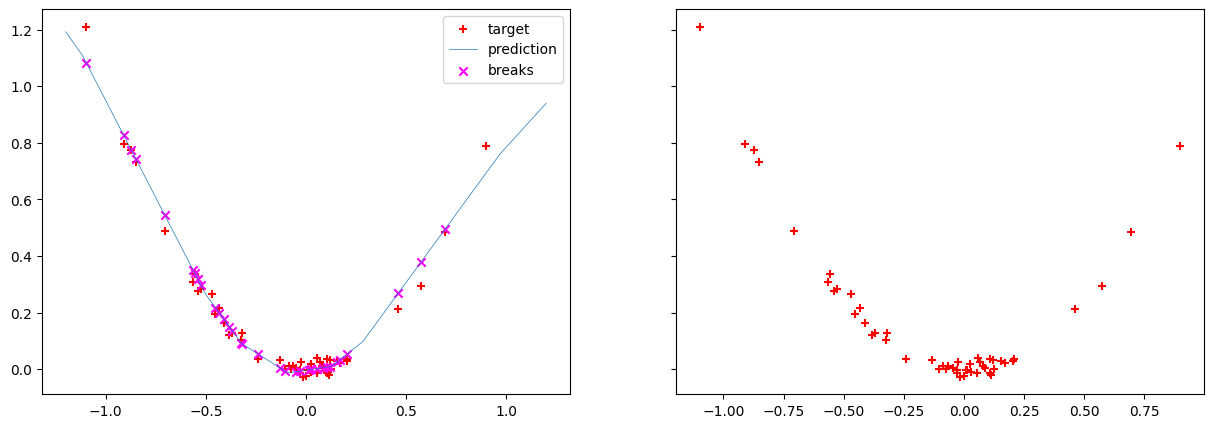

In [90]:
X_pred = np.linspace(-1.2, 1.2, 1000)

bpoints = Slopes.slope_checker(model, X, max_delta=0.0001)
print(f"model contains {len(bpoints)} breaks")

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax1.scatter(X, y, marker="+", color='red', label="target")
ax1.plot(X_pred, model.predict(X_pred), label="prediction",  linewidth=0.5)
ax1.scatter(*zip(*bpoints), marker="x", color='magenta', label="breaks")
ax1.legend()
ax2.scatter(X, y, marker="+", color='red', label="target")
plt.show()


## Järeldused
Adam on parem kui SGD, ei teagi jah